In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# pandas documentation ; sklearn documentation

try:
    from sklearn.model_selection import train_test_split # from carrega somente modulo
except:
    from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression # Biblioteca para criar algoritmo de Regressão Logistica
from sklearn.ensemble import RandomForestClassifier # Algoritmo de Random Forest
from sklearn.tree import DecisionTreeClassifier # Algoritmo de Arvore de Decisão

%matplotlib inline

In [39]:
# Lendo o dataset de treino
df = pd.read_csv('train.csv')


In [40]:
# Primeiras linhas do DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
 df.shape # tamanho linhas x colunas


(614, 13)

In [42]:
df.describe() # gera estatisticas

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [43]:
df.dtypes

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

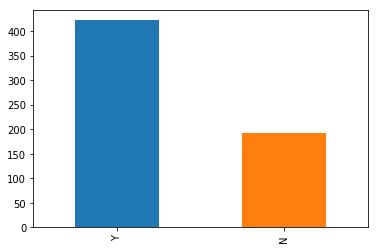

In [44]:
                                      # Gerando visualizações para ver quantos dados temos em cada classe que queremos prever
df['Loan_Status'].value_counts().plot(kind='bar')
plt.show()

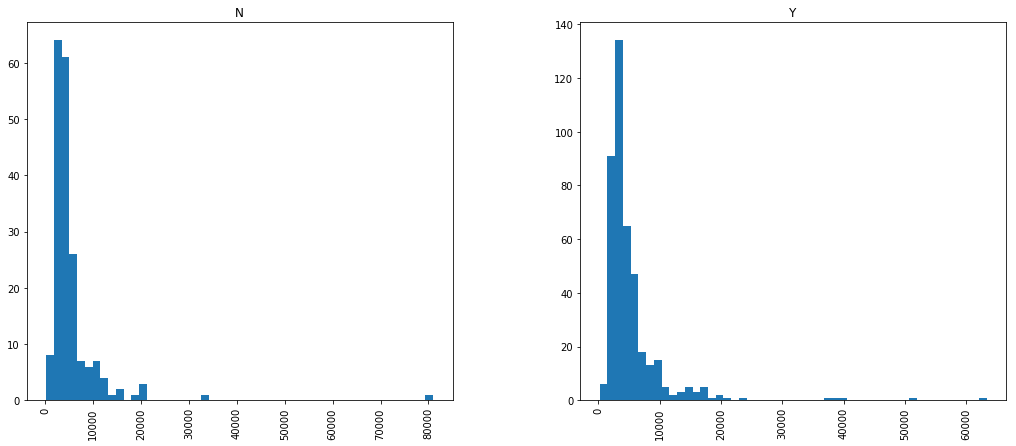

In [45]:
# O gráfico abaixo irá gerar um gráfico para cada uma das colunas e mostrará como está a distribuição
# de renda (Applicant Income) 
df[['Loan_Status','ApplicantIncome']].hist(by='Loan_Status', figsize=(17,7), bins=50)
plt.show()

In [46]:
# Renomeando colunas
df.columns = ['Loan_ID', 'is_Male', 'is_Married', 'Dependents', 'is_Graduated',
              'is_Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
              'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [47]:
# Vamos usar o map para que possamos alterar os valores de YES ou NO para binários
yes_no_map = {'Yes': 1, 'No': 0}
df['is_Married'] = df['is_Married'].map(yes_no_map)

In [48]:
# Vamos criar uma coluna que contém o Total de renda dos aplicante, 
# somando as colunas ApplicantIncome e CoapplicantIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [49]:
# Por fim, vamos mappear a coluna que queremos prever 
mapper_status = {'Y': 1,
                 'N': 0}
df['Loan_Status'] = df['Loan_Status'].map(mapper_status)

In [50]:
# Primeiras linhas do novo DataFrame
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [51]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [92]:
df.drop('Loan_ID',axis=1,inplace=True)

In [65]:
# Vamos ver quantos valores nulos tem em cada coluna
df.isnull().sum().sort_values(ascending=False)

TotalIncome          0
Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
is_Self_Employed     0
is_Graduated         0
Dependents           0
is_Married           0
is_Male              0
Loan_ID              0
dtype: int64

In [66]:
# A coluna is_Married possui apenas 3 valores nulos. Irei desconsiderar essas linhas.
# Vamos utilizar a função .loc para selecionar todas as linhas que não contém dados nulos na coluna is_Married
df = df.loc[df['is_Married'].notnull()]

In [67]:
# Também podemos preencher valores nulos com a média.
# Aqui, vamos preencher a coluna LoanAmount com a média
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [68]:
# Vamos ver quantos valores nulos tem em cada coluna
df.isnull().sum().sort_values(ascending=False)

TotalIncome          0
Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
is_Self_Employed     0
is_Graduated         0
Dependents           0
is_Married           0
is_Male              0
Loan_ID              0
dtype: int64

In [69]:
# De forma semelhante aos anteriores, vamos preencher o valor da coluna Credit_History
# com o valor mais frequente
df['Credit_History'].value_counts()

1.0    522
0.0     89
Name: Credit_History, dtype: int64

In [70]:
df['Credit_History'].fillna(1, inplace=True)

In [93]:
 df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,8.674026,0.0,146.369492,360.0,1.0,1,8.674026,0,0,1
1,1.0,1.0,1.0,1,0.0,8.430109,1508.0,128.000000,360.0,1.0,0,8.714568,1,0,0
2,1.0,1.0,0.0,1,1.0,8.006368,0.0,66.000000,360.0,1.0,1,8.006368,0,0,1
3,1.0,1.0,0.0,0,0.0,7.856707,2358.0,120.000000,360.0,1.0,1,8.505323,0,0,1
4,1.0,0.0,0.0,1,0.0,8.699515,0.0,141.000000,360.0,1.0,1,8.699515,0,0,1


In [72]:
# Vamos ver quantos valores nulos tem em cada coluna
df.isnull().sum().sort_values(ascending=False)

TotalIncome          0
Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
is_Self_Employed     0
is_Graduated         0
Dependents           0
is_Married           0
is_Male              0
Loan_ID              0
dtype: int64

In [73]:
# No Pandas, podemos utilizar a função .corr() para verificar a correlação de um DataFrame
df.corr()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome
is_Male,1.000000,0.367926,0.172422,-0.044560,-0.001284,0.061997,0.082028,0.108135,-0.082177,0.010004,0.019381,0.095791
is_Married,0.367926,1.000000,0.337748,-0.014223,0.005904,0.051332,0.077770,0.146981,-0.102624,0.009481,0.089280,0.083776
Dependents,0.172422,0.337748,1.000000,-0.053947,0.055471,0.118901,0.028788,0.163692,-0.103619,-0.038736,0.012593,0.125490
is_Graduated,-0.044560,-0.014223,-0.053947,1.000000,0.011414,0.140590,0.063585,0.166864,0.073701,0.072670,0.084286,0.161765
is_Self_Employed,-0.001284,0.005904,0.055471,0.011414,1.000000,0.127550,-0.017019,0.115500,-0.033421,-0.000757,-0.002404,0.112919
ApplicantIncome,0.061997,0.051332,0.118901,0.140590,0.127550,1.000000,-0.116266,0.566037,-0.044361,-0.018900,-0.005154,0.893069
CoapplicantIncome,0.082028,0.077770,0.028788,0.063585,-0.017019,-0.116266,1.000000,0.188151,-0.059135,0.012093,-0.057733,0.343035
LoanAmount,0.108135,0.146981,0.163692,0.166864,0.115500,0.566037,0.188151,1.000000,0.036135,-0.001631,-0.036782,0.620553
Loan_Amount_Term,-0.082177,-0.102624,-0.103619,0.073701,-0.033421,-0.044361,-0.059135,0.036135,1.000000,-0.005291,-0.023619,-0.068741
Credit_History,0.010004,0.009481,-0.038736,0.072670,-0.000757,-0.018900,0.012093,-0.001631,-0.005291,1.000000,0.540021,-0.012396


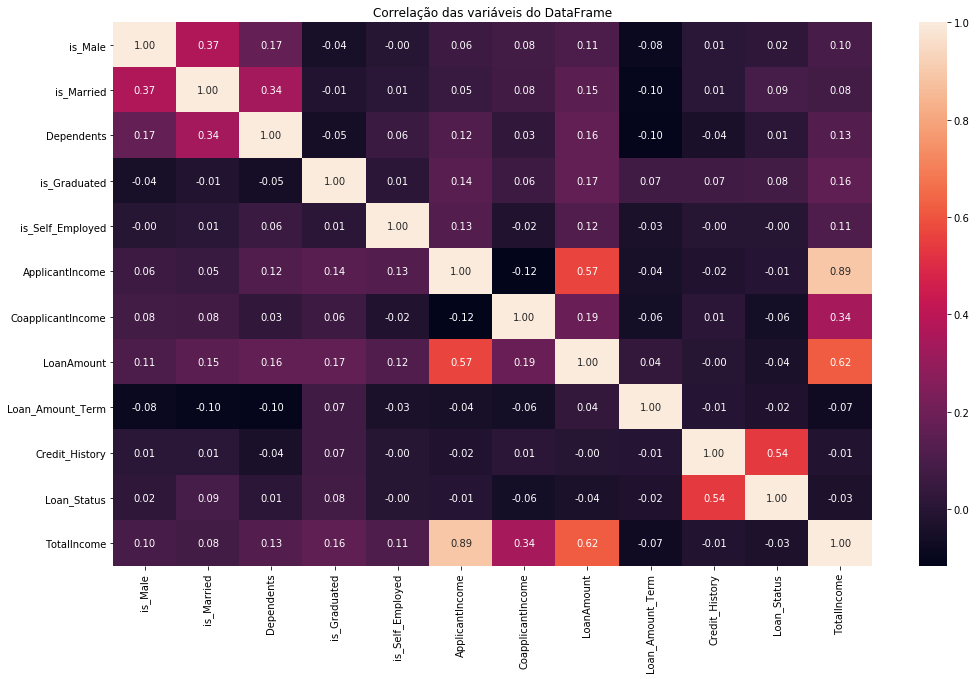

In [74]:
# Para melhorar a visualização, podemos criar um mapa de calor
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlação das variáveis do DataFrame')
plt.show()

In [75]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,Urban,1,5849.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0


In [76]:
df['ApplicantIncome'] 

0       5849
1       4583
2       3000
3       2583
4       6000
5       5417
6       2333
7       3036
8       4006
9      12841
10      3200
11      2500
12      3073
13      1853
14      1299
15      4950
16      3596
17      3510
18      4887
19      2600
20      7660
21      5955
22      2600
23      3365
24      3717
25      9560
26      2799
27      4226
28      1442
29      3750
       ...  
584     2787
585     4283
586     2297
587     2165
588     4750
589     2726
590     3000
591     6000
592     9357
593     3859
594    16120
595     3833
596     6383
597     2987
598     9963
599     5780
600      416
601     2894
602     5703
603     3676
604    12000
605     2400
606     3400
607     3987
608     3232
609     2900
610     4106
611     8072
612     7583
613     4583
Name: ApplicantIncome, Length: 611, dtype: int64

In [77]:
# Normalizando coluna que possuem uma dispersão muito alta
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['TotalIncome'] = np.log(df['TotalIncome'])

In [78]:
df['Property_Area'].unique()


array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [79]:
df = pd.get_dummies(df,columns=['Property_Area'])

In [80]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,0.0,0.0,1,0.0,8.674026,0.0,146.369492,360.0,1.0,1,8.674026,0,0,1
1,LP001003,1.0,1.0,1.0,1,0.0,8.430109,1508.0,128.000000,360.0,1.0,0,8.714568,1,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,8.006368,0.0,66.000000,360.0,1.0,1,8.006368,0,0,1
3,LP001006,1.0,1.0,0.0,0,0.0,7.856707,2358.0,120.000000,360.0,1.0,1,8.505323,0,0,1
4,LP001008,1.0,0.0,0.0,1,0.0,8.699515,0.0,141.000000,360.0,1.0,1,8.699515,0,0,1


In [81]:
df['ApplicantIncome'] 

0      8.674026
1      8.430109
2      8.006368
3      7.856707
4      8.699515
5      8.597297
6      7.754910
7      8.018296
8      8.295549
9      9.460398
10     8.070906
11     7.824046
12     8.030410
13     7.524561
14     7.169350
15     8.507143
16     8.187577
17     8.163371
18     8.494334
19     7.863267
20     8.943767
21     8.691986
22     7.863267
23     8.121183
24     8.220672
25     9.165343
26     7.937017
27     8.349011
28     7.273786
29     8.229511
         ...   
584    7.932721
585    8.362409
586    7.739359
587    7.680176
588    8.465900
589    7.910591
590    8.006368
591    8.699515
592    9.143880
593    8.258163
594    9.687816
595    8.251403
596    8.761393
597    8.002025
598    9.206634
599    8.662159
600    6.030685
601    7.970395
602    8.648748
603    8.209580
604    9.392662
605    7.783224
606    8.131531
607    8.290794
608    8.080856
609    7.972466
610    8.320205
611    8.996157
612    8.933664
613    8.430109
Name: ApplicantIncome, L

In [95]:
df.to_csv('tratado')

In [96]:
# Criando variáveis com nossas features
X = df.drop('Loan_Status', axis=1)
# Criando variável com coluna que queremos prever
y = df['Loan_Status']

In [97]:
X.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,8.674026,0.0,146.369492,360.0,1.0,8.674026,0,0,1
1,1.0,1.0,1.0,1,0.0,8.430109,1508.0,128.000000,360.0,1.0,8.714568,1,0,0
2,1.0,1.0,0.0,1,1.0,8.006368,0.0,66.000000,360.0,1.0,8.006368,0,0,1
3,1.0,1.0,0.0,0,0.0,7.856707,2358.0,120.000000,360.0,1.0,8.505323,0,0,1
4,1.0,0.0,0.0,1,0.0,8.699515,0.0,141.000000,360.0,1.0,8.699515,0,0,1


In [108]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [117]:
# Criando conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [118]:
# Vamos começar treinando uma Regressão Logística
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Score conjunto de treino: {0:.2%}'.format(lr.score(X_train, y_train)))
print('Score conjunto de teste: {0:.2%}'.format(lr.score(X_test, y_test)))

Score conjunto de treino: 80.44%
Score conjunto de teste: 82.18%


In [119]:
lr.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1], dtype=int64)

In [120]:
# Podemos testar também outros modelos, como uma Arvore de Decisão simples
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print('Score conjunto de treino: {0:.2%}'.format(dt.score(X_train, y_train)))
print('Score conjunto de teste: {0:.2%}'.format(dt.score(X_test, y_test)))

Score conjunto de treino: 100.00%
Score conjunto de teste: 72.77%


In [121]:
# O modelo acima gerou ovefitting em nosso treino (quando o modelo aprende muito bem o conjunto de treino, mas não é bom para entender novos casos)
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

print('Score conjunto de treino: {0:.2%}'.format(dt.score(X_train, y_train)))
print('Score conjunto de teste: {0:.2%}'.format(dt.score(X_test, y_test)))

Score conjunto de treino: 82.64%
Score conjunto de teste: 83.17%


In [122]:
# Por fim, vamos tentar uma Random Forest para ver se nosso modelo performa melhor
rf = RandomForestClassifier(n_estimators=100,max_depth=4)
rf.fit(X_train, y_train)

print('Score conjunto de treino: {0:.2%}'.format(rf.score(X_train, y_train)))
print('Score conjunto de teste: {0:.2%}'.format(rf.score(X_test, y_test)))

Score conjunto de treino: 81.91%
Score conjunto de teste: 81.68%


In [123]:
new_df =X_test
dt.predict(new_df)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1], dtype=int64)

In [125]:
new_df['Loan_Status'] = dt.predict(new_df)

C:\Users\Isabelle\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
new_df.to_csv('dados_possivelmente_aprovados.csv')

In [128]:
new_df


,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
81,1.0,1.0,1.0,1,1.0,7.781139,0.000000,146.369492,360.0,1.0,7.781139,0,1,0,1
219,0.0,1.0,2.0,1,0.0,8.362409,2383.000000,127.000000,360.0,1.0,8.804775,0,1,0,1
55,1.0,1.0,2.0,1,0.0,7.903966,1167.000000,97.000000,360.0,1.0,8.262301,0,1,0,1
602,1.0,1.0,3.0,1,0.0,8.648748,0.000000,128.000000,360.0,1.0,8.648748,0,0,1,1
266,1.0,1.0,2.0,1,0.0,8.457018,1387.000000,150.000000,360.0,1.0,8.715224,0,1,0,1
156,1.0,1.0,1.0,1,0.0,8.699515,0.000000,160.000000,360.0,1.0,8.699515,1,0,0,1
486,1.0,0.0,2.0,1,0.0,8.173857,0.000000,80.000000,360.0,0.0,8.173857,1,0,0,0
323,0.0,0.0,0.0,1,0.0,8.060224,2985.000000,132.000000,360.0,1.0,8.724370,1,0,0,1
584,1.0,1.0,1.0,1,0.0,7.932721,1917.000000,146.000000,360.0,0.0,8.456168,1,0,0,0
293,0.0,0.0,0.0,1,0.0,8.597297,0.000000,143.000000,480.0,0.0,8.597297,0,0,1,0


In [130]:
import pickle
pickle.dump(dt,open('modelo_treinado.sav','wb')) # salvar / exportar modelo